In [44]:
import collections
import datetime
import time
import requests
import pandas as pd
import sqlite3 as lite
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Hard code cities :(
cityloc=collections.defaultdict()
cityloc={'Denver':'39.761850,-104.881105','Cleveland':'41.478462,-81.679435','Minneapolis':'44.963324,-93.268320','Washington':'38.904103,-77.017229','Seattle':'47.620499,-122.350876'}

In [12]:
#===
#Build MaxTemp Database
#===
#Create SQLite commands
sql=""
for key in cityloc.keys():
    sql = sql + str(key) + " INT, "

#Key of API & url
APIkey='7d19355e20465a946c9207815d652a28'
URLbase='https://api.forecast.io/forecast/'

#Create database
con = lite.connect('weather.db')
cur = con.cursor()

with con:
    cur.execute('DROP TABLE IF EXISTS MaxTemp')
    cur.execute("CREATE TABLE MaxTemp (date INT, "+sql[:-2]+")")
    
    for i in range(30,0,-1):
        evaldate=datetime.datetime.now()-datetime.timedelta(days=i)
        cur.execute('INSERT INTO MaxTemp (date) VALUES (?)', (evaldate.strftime("%Y-%m-%d"),))
        
        for key,val in cityloc.items():
            r = requests.get(URLbase+APIkey+'/'+val+','+str(int(time.mktime(evaldate.timetuple()))))
            cur.execute('UPDATE MaxTemp SET '+str(key)+' = '+str(r.json()['daily']['data'][0]['apparentTemperatureMax'])+' WHERE date = '+"'"+evaldate.strftime("%Y-%m-%d")+"';")

Temperature Date Range: 2016-06-23 to 2016-07-22

Max Temperature Details for Seattle:
Max Max Temperature: 76.76
Max Temperature Range: 12.63
Mean Max Temperature: 70.03
Max Temperature Variance: 12.93

Max Temperature Details for Washington:
Max Max Temperature: 103.42
Max Temperature Range: 30.76
Mean Max Temperature: 89.65
Max Temperature Variance: 60.91

Max Temperature Details for Minneapolis:
Max Max Temperature: 104.03
Max Temperature Range: 34.44
Mean Max Temperature: 84.46
Max Temperature Variance: 82.44

Max Temperature Details for Denver:
Max Max Temperature: 91.37
Max Temperature Range: 16.21
Mean Max Temperature: 84.57
Max Temperature Variance: 16.31

Max Temperature Details for Cleveland:
Max Max Temperature: 98.50
Max Temperature Range: 26.46
Mean Max Temperature: 83.24
Max Temperature Variance: 59.33



([<matplotlib.axis.XTick at 0xb872080>,
 <a list of 30 Text xticklabel objects>)

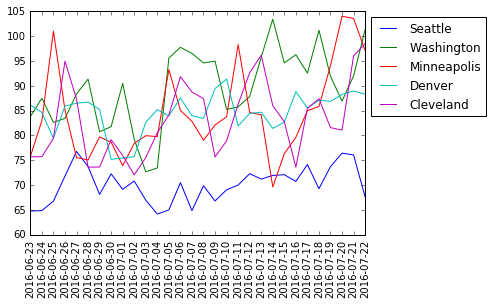

In [75]:
#Query database and place into pandas
MTemp=pd.read_sql_query('SELECT * FROM MaxTemp ORDER BY date',con,index_col='date')

print('Temperature Date Range: %s to %s\n' % (min(MTemp.index),max(MTemp.index)))
for key in MTemp.keys():
    print('Max Temperature Details for %s:' % key)
    print('Max Max Temperature: %0.2f' % max(MTemp[key]))
    print('Max Temperature Range: %0.2f' % (max(MTemp[key])-min(MTemp[key])))
    print('Mean Max Temperature: %0.2f' % MTemp[key].mean())
    print('Max Temperature Variance: %0.2f\n' % MTemp[key].var())
    
    plt.plot([datetime.datetime.strptime(d,"%Y-%m-%d") for d in MTemp.index],[t for t in MTemp[key]])

plt.legend([key for key in MTemp.keys()],loc='upper left',bbox_to_anchor=(1,1))
plt.xticks([datetime.datetime.strptime(d,"%Y-%m-%d") for d in MTemp.index],[d for d in MTemp.index], rotation='vertical')

In [63]:
#Minneapolis had the largest change in max temperature over the time period.
#

datetime.datetime(2016, 6, 23, 0, 0)